<a href="https://colab.research.google.com/github/MiekeNap/DataAnalytics_FinalAssignment/blob/main/Final_Assignment_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 3

**Which non-fossil fuel energy technology will have the best price in the future?**

To be able to predict prices you'll probably need to use linear regression over the various non-fossil fuel options.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

import matplotlib.font_manager
%matplotlib inline
from matplotlib.pyplot import figure
import plotly.express as px 
from scipy import stats

from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


# Preparing data set

In [ ]:
# I found a dataset with levalized cost of energy by technology, and used this to predict best non-fossil fuel prices for the future
data = '/content/drive/MyDrive/Colab Notebooks/Final Assignment/levelized-cost-of-energy.csv'
df = pd.read_csv(data)

def get_data():
  return pd.read_csv(data)

df = get_data()
get_data()

,Entity,Code,Year,Bioenergy levelized cost of energy,Geothermal levelized cost of energy,Offshore wind levelized cost of energy,Solar photovoltaic levelized cost of energy,Concentrated solar power levelized cost of energy,Hydropower levelized cost of energy,Onshore wind levelized cost of energy
0,Australia,AUS,2010,NaN,NaN,NaN,0.423957,NaN,NaN,NaN
1,Australia,AUS,2011,NaN,NaN,NaN,0.430691,NaN,NaN,NaN
2,Australia,AUS,2012,NaN,NaN,NaN,0.261030,NaN,NaN,NaN
3,Australia,AUS,2013,NaN,NaN,NaN,0.150157,NaN,NaN,NaN
4,Australia,AUS,2014,NaN,NaN,NaN,0.123621,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
481,World,OWID_WRL,1995,NaN,NaN,NaN,NaN,NaN,NaN,0.207732
482,World,OWID_WRL,1996,NaN,NaN,NaN,NaN,NaN,NaN,0.185732
483,World,OWID_WRL,1997,NaN,NaN,NaN,NaN,NaN,NaN,0.163131
484,World,OWID_WRL,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.152881


In [ ]:
# A lot of countries are missing a lot of data and therefore i have only used the data for 'World'
world = get_data().Entity == 'World'
df_world = get_data().loc[world]
df_world.columns
# Renaming the columns to shorter names
df_world.columns = ['Entity', 'Code', 'Year', 'Bioenergy',
       'Geothermal',
       'Offshore wind',
       'Solar photovoltaic',
       'Concentrated solar power',
       'Hydropower',
       'Onshore wind']
df_world = df_world.drop(columns='Code')  
df_world

,Entity,Year,Bioenergy,Geothermal,Offshore wind,Solar photovoltaic,Concentrated solar power,Hydropower,Onshore wind
447,World,2010,0.078189,0.050445,0.187857,0.417149,0.358004,0.038883,0.102061
448,World,2011,0.056684,NaN,0.197549,0.311298,0.346655,0.036561,0.096487
449,World,2012,0.061879,0.085695,0.166601,0.232633,0.337574,0.038038,0.088390
450,World,2013,0.082198,0.064111,0.166662,0.179401,0.248888,0.042512,0.089206
451,World,2014,0.082375,0.065335,0.172199,0.161258,0.216377,0.042457,0.080203
452,World,2015,0.072771,0.058849,0.140527,0.121080,0.223889,0.036572,0.068962
453,World,2016,0.071178,0.067802,0.116323,0.106340,0.247269,0.048389,0.063855
454,World,2017,0.071070,0.070917,0.106152,0.083660,0.206213,0.050722,0.059959
455,World,2018,0.055360,0.067583,0.100049,0.071139,0.149103,0.039837,0.050880
456,World,2019,0.063933,0.067305,0.086388,0.062119,0.211831,0.041409,0.044592


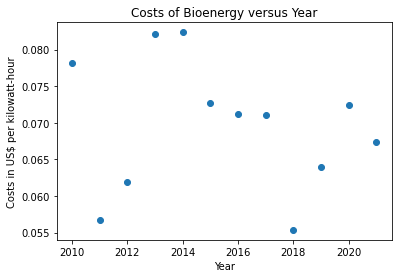

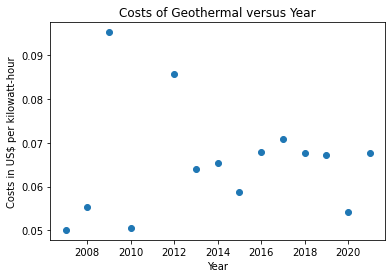

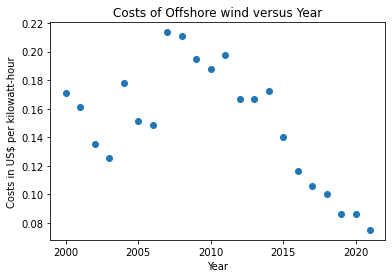

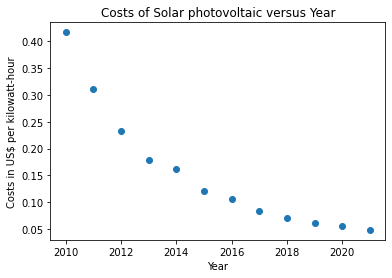

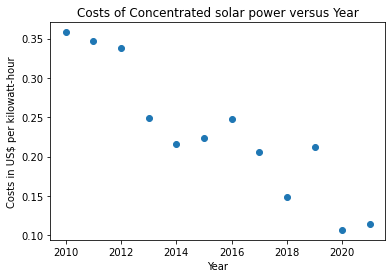

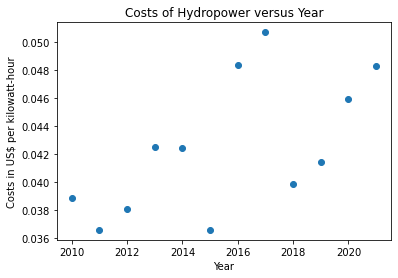

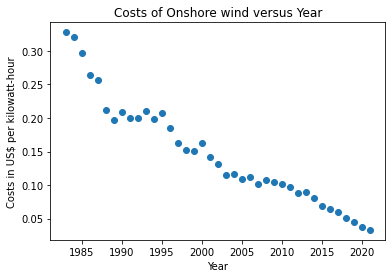

In [ ]:
# First look at the available data
def make_scatterplot(df, colX, colY):
  fig, ax = plt.subplots()
  
  x = df[colX]
  y = df[colY]
  plt.scatter(x, y)

  plt.xlabel(colX)
  plt.ylabel('Costs in US$ per kilowatt-hour')
  plt.title(f'Costs of {colY} versus {colX}')
  #fig.set_size_inches(10,10)
  plt.show()

#'Bioenergy', 'Geothermal', 'Offshore wind', 'Solar photovoltaic',
 #      'Concentrated solar power', 'Hydropower', 'Onshore wind'
make_scatterplot(df_world, 'Year', 'Bioenergy') 
make_scatterplot(df_world, 'Year', 'Geothermal') 
make_scatterplot(df_world, 'Year', 'Offshore wind') 
make_scatterplot(df_world, 'Year', 'Solar photovoltaic') 
make_scatterplot(df_world, 'Year', 'Concentrated solar power') 
make_scatterplot(df_world, 'Year', 'Hydropower') 
make_scatterplot(df_world, 'Year', 'Onshore wind')  

# Linear regression with python

I have first tried to calculate and plot a regression line for one technology.
Then i have made a function to do the same for each technology.

The a and b values for the regression line are: [-6.61210668e-03  1.33854627e+01]
r2 score of the regression line = 0.936


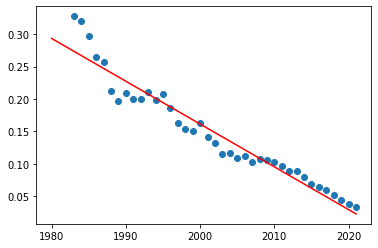

In [ ]:
# plot for Onshore wind
onshore_wind = df_world[['Year', 'Onshore wind']]
#onshore_wind
#fig, ax = plt.subplots()
x = onshore_wind['Year']
y = onshore_wind['Onshore wind']
plt.scatter(x, y)

model = np.polyfit(x, y, 1)
print(f'The a and b values for the regression line are: {model}') # result: y = a * x + b

predict = np.poly1d(model)
year = 2018
predict(year)

r2 = round(r2_score(y, predict(x)), 3)
print(f'r2 score of the regression line = {r2}')

x_lin_reg = range(1980, 2022)
y_lin_reg = predict(x_lin_reg)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')

#plt.xlabel('Year')
#plt.ylabel('Costs in US$ per kilowatt-hour')
#plt.title('Costs of Onshore wind')

plt.show()

In [ ]:
def make_regression(df, colX, colY, n):
 
  df_energy = df[[colX, colY]].dropna()
 
  fig, ax = plt.subplots()
  
  x = df_energy[colX]
  y = df_energy[colY]
  plt.scatter(x, y)

  model = np.polyfit(x, y, n)
  print(f'The values for the regression line are: {model}')


  predict = np.poly1d(model)
  year = 2022
  price = round(predict(year), 3)
  print(f'The costs of {colY} in {year} will be : {price}US$ per kWh')

  r2 = round(r2_score(y, predict(x)), 4)
  print(f'r2 score of the regression line = {r2}')

  x_lin_reg = df_energy[colX]
  y_lin_reg = predict(x_lin_reg)
  plt.plot(x_lin_reg, y_lin_reg, c = 'r')

  plt.xlabel(colX)
  plt.ylabel('US$ per kilowatt-hour')
  plt.title(f'Costs of {colY}')
  #fig.set_size_inches(10,10)
  plt.show()


The values for the regression line are: [-4.63409811e-04  1.00362368e+00]
The costs of Bioenergy in 2022 will be : 0.067US$ per kWh
r2 score of the regression line = 0.0347


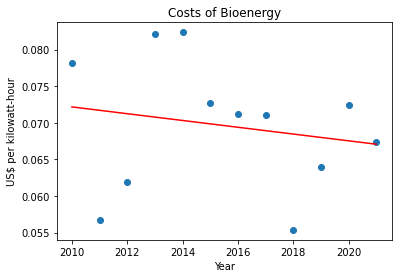

The values for the regression line are: [ 6.91564209e-05 -7.35285307e-02]
The costs of Geothermal in 2022 will be : 0.066US$ per kWh
r2 score of the regression line = 0.0006


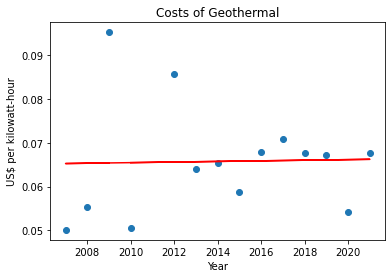

The values for the regression line are: [-3.74143028e-03  7.67178069e+00]
The costs of Offshore wind in 2022 will be : 0.107US$ per kWh
r2 score of the regression line = 0.3446


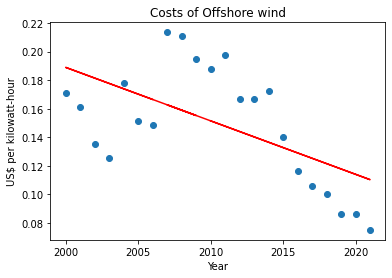

The values for the regression line are: [-2.91677273e-02  5.89417100e+01]
The costs of Solar photovoltaic in 2022 will be : -0.035US$ per kWh
r2 score of the regression line = 0.837


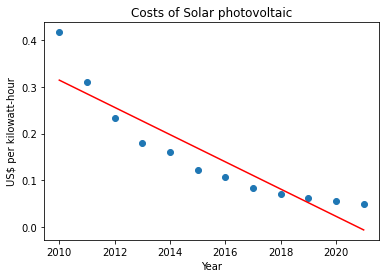

The values for the regression line are: [-2.17749603e-02  4.41179906e+01]
The costs of Concentrated solar power in 2022 will be : 0.089US$ per kWh
r2 score of the regression line = 0.8638


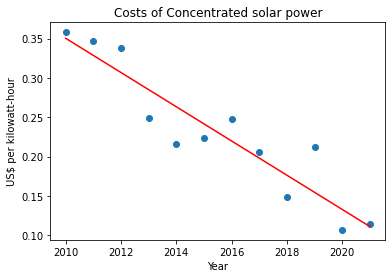

The values for the regression line are: [ 8.21908437e-04 -1.61408612e+00]
The costs of Hydropower in 2022 will be : 0.048US$ per kWh
r2 score of the regression line = 0.3721


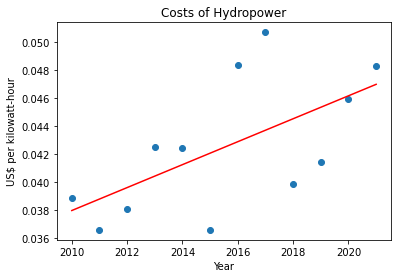

The values for the regression line are: [-6.61210668e-03  1.33854627e+01]
The costs of Onshore wind in 2022 will be : 0.016US$ per kWh
r2 score of the regression line = 0.9355


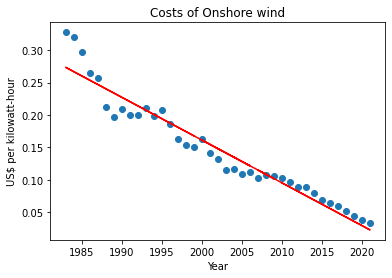

In [ ]:
#'Bioenergy', 'Geothermal', 'Offshore wind', 'Solar photovoltaic',
 #      'Concentrated solar power', 'Hydropower', 'Onshore wind'
make_regression(df_world, 'Year', 'Bioenergy', 1)
make_regression(df_world, 'Year', 'Geothermal', 1)
make_regression(df_world, 'Year', 'Offshore wind', 1)
make_regression(df_world, 'Year', 'Solar photovoltaic', 1)
make_regression(df_world, 'Year', 'Concentrated solar power', 1)
make_regression(df_world, 'Year', 'Hydropower', 1)
make_regression(df_world, 'Year', 'Onshore wind', 1)

With some of plots a 2nd (or higher) degree polynomial plot would give a higher r2, but I think there are not enough datapoints in this dataset to calculate proper regression lines, so I have kept it simple to give an indication of the cheapest energy technology in the short future.

# Poynomial with sci-kit learn

I tried this method to see if it would give better results than the linear regression with python. At the end i used the python method, because i think that the dataset is too small to set up a proper regression line.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


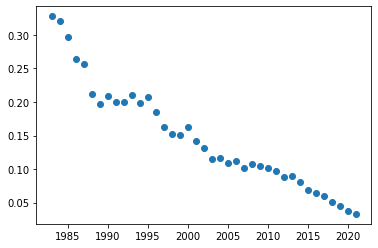

In [ ]:
onshore_wind = df_world[['Year', 'Onshore wind']]
#onshore_wind
x = onshore_wind['Year'].to_numpy()
y = onshore_wind['Onshore wind']

plt.scatter(x, y)
plt.show()

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1,1))

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [ ]:
y_predicted = poly_reg_model.predict(poly_features)
y_predicted

array([0.08828528, 0.08352952, 0.07899215, 0.07467317, 0.07057259,
       0.0666904 , 0.0630266 , 0.0595812 , 0.05635419, 0.05334557,
       0.05055535, 0.04798352, 0.10386293, 0.09845199, 0.09325944,
       0.14785455, 0.14091485, 0.13419355, 0.12769064, 0.12140612,
       0.11534   , 0.10949227, 0.29924357, 0.28859119, 0.2781572 ,
       0.2679416 , 0.2579444 , 0.24816559, 0.23860517, 0.22926315,
       0.22013952, 0.21123428, 0.20254744, 0.19407899, 0.18582893,
       0.17779727, 0.169984  , 0.16238912, 0.15501264])

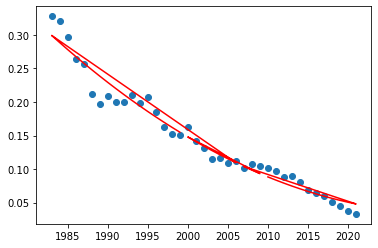

In [ ]:
plt.scatter(x,y)
plt.plot(x, y_predicted, c='red')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
onshore_wind = df_world[['Year', 'Onshore wind']]
#onshore_wind
x1 = onshore_wind['Year'].to_numpy()
y1 = onshore_wind['Onshore wind'].to_numpy()
onshore_wind.shape

(39, 2)

In [ ]:
df = pd.DataFrame({"x1":x1.reshape(39,), "y1":y1.reshape(39,)}, index=range(0,39))
df

,x1,y1
0,2010,0.102061
1,2011,0.096487
2,2012,0.088390
3,2013,0.089206
4,2014,0.080203
5,2015,0.068962
6,2016,0.063855
7,2017,0.059959
8,2018,0.050880
9,2019,0.044592


In [ ]:
X, y = x1, y1
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.reshape(-1,1))
X_train, X_test, y_train, y_test = train_test_split(poly_features, y1, test_size=0.3, random_state=42)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
poly_reg_y_predicted = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

0.015229142934033492

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train.reshape(-1,1), y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test.reshape(-1,1))
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

0.017486733972458045

In [ ]:
lin_reg_model.coef_

array([-0.00672155])

In [ ]:
lin_reg_model.intercept_

13.60508911319938

In [ ]:
poly_reg_model.coef_

array([-4.64166356e-01,  1.14236637e-04])

2nd degree polynomial value is 0.015229142934033492

linear regression is 0.017486733972458045

both result in very poor values and are very close